In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
P7_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Participant-07.csv", sep=",")
P7_data 

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,32.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0
...,...,...,...
6128,13-Sep-2022 07:00,13-Sep-2022 08:00,798.0
6129,13-Sep-2022 08:00,13-Sep-2022 09:00,139.0
6130,13-Sep-2022 09:00,13-Sep-2022 10:00,392.0
6131,13-Sep-2022 10:00,13-Sep-2022 11:00,328.0


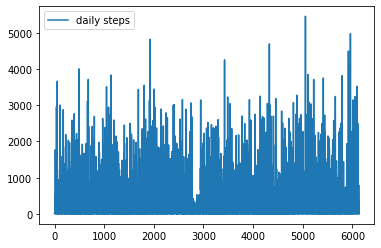

In [4]:
y = P7_data['Steps (count)']
# x = np.linspace(0,6133)
plt.plot(y,label = 'daily steps')
plt.legend()
plt.show()

In [5]:
P7_data['Steps (count)'].fillna(0,inplace = True)
data07 = P7_data.drop(['Start'],axis = 1)
data07

,Finish,Steps (count)
0,01-Jan-2022 01:00,32.0
1,01-Jan-2022 02:00,0.0
2,01-Jan-2022 03:00,0.0
3,01-Jan-2022 04:00,0.0
4,01-Jan-2022 05:00,0.0
...,...,...
6128,13-Sep-2022 08:00,798.0
6129,13-Sep-2022 09:00,139.0
6130,13-Sep-2022 10:00,392.0
6131,13-Sep-2022 11:00,328.0


In [6]:
Date = data07['Finish']
# for i in range(count(Date))
dates= []
p = len(Date)
i = 0
for i in range(p):
  Date[i] = Date[i][0:11]
  dates.append(Date[i])
# dates

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
# Date01 = data07['Finish']
# date07 = []
# for i in range(len(Date01)):
#   for line in Date01:
#     if line[3:6] == 'Jan':
#       line[3:6].replace('01')
      
#     elif line[3:6] =='Feb':
#       line[3:6] = '2'
#     else:
#       pass


In [7]:
data07

,Finish,Steps (count)
0,01-Jan-2022,32.0
1,01-Jan-2022,0.0
2,01-Jan-2022,0.0
3,01-Jan-2022,0.0
4,01-Jan-2022,0.0
...,...,...
6128,13-Sep-2022,798.0
6129,13-Sep-2022,139.0
6130,13-Sep-2022,392.0
6131,13-Sep-2022,328.0


In [8]:
data07['Finish'] = data07['Finish'].apply(pd.to_datetime)
data07
# print(type(data07['Finish']))

,Finish,Steps (count)
0,2022-01-01,32.0
1,2022-01-01,0.0
2,2022-01-01,0.0
3,2022-01-01,0.0
4,2022-01-01,0.0
...,...,...
6128,2022-09-13,798.0
6129,2022-09-13,139.0
6130,2022-09-13,392.0
6131,2022-09-13,328.0


In [9]:
data07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6133 entries, 0 to 6132
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Finish         6133 non-null   datetime64[ns]
 1   Steps (count)  6133 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 96.0 KB


In [19]:
weeksum = pd.DataFrame(data07.resample('w',on = 'Finish')['Steps (count)'].sum()).reset_index()
weeksum.head(10)

,Finish,Steps (count)
0,2022-01-02,14740.0
1,2022-01-09,48061.0
2,2022-01-16,45772.0
3,2022-01-23,64605.0
4,2022-01-30,52111.0
5,2022-02-06,52746.0
6,2022-02-13,57124.0
7,2022-02-20,66694.0
8,2022-02-27,47431.0
9,2022-03-06,51290.0


In [26]:
import plotly.express as px
plot = px.box(weeksum,x ='Steps (count)')
plot.show()

In [40]:
fig = px.histogram(weeksum, x="Finish",y ='Steps (count)' ,nbins =len(weeksum),color_discrete_sequence=['indianred'])
fig.show()

In [53]:
W7 = weeksum.groupby([weeksum['Finish'].dt.isocalendar().week]).sum().rename_axis(['week']).reset_index()
W7.head(10)

,week,Steps (count)
0,1,48061.0
1,2,45772.0
2,3,64605.0
3,4,52111.0
4,5,52746.0
5,6,57124.0
6,7,66694.0
7,8,47431.0
8,9,51290.0
9,10,53692.0


In [54]:
fig = px.pie(W7, values='Steps (count)', names='week', title="Weeks of steps")
fig.show()